In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()
#.describe( ) her kolonun summary istatistiklerini verir.

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

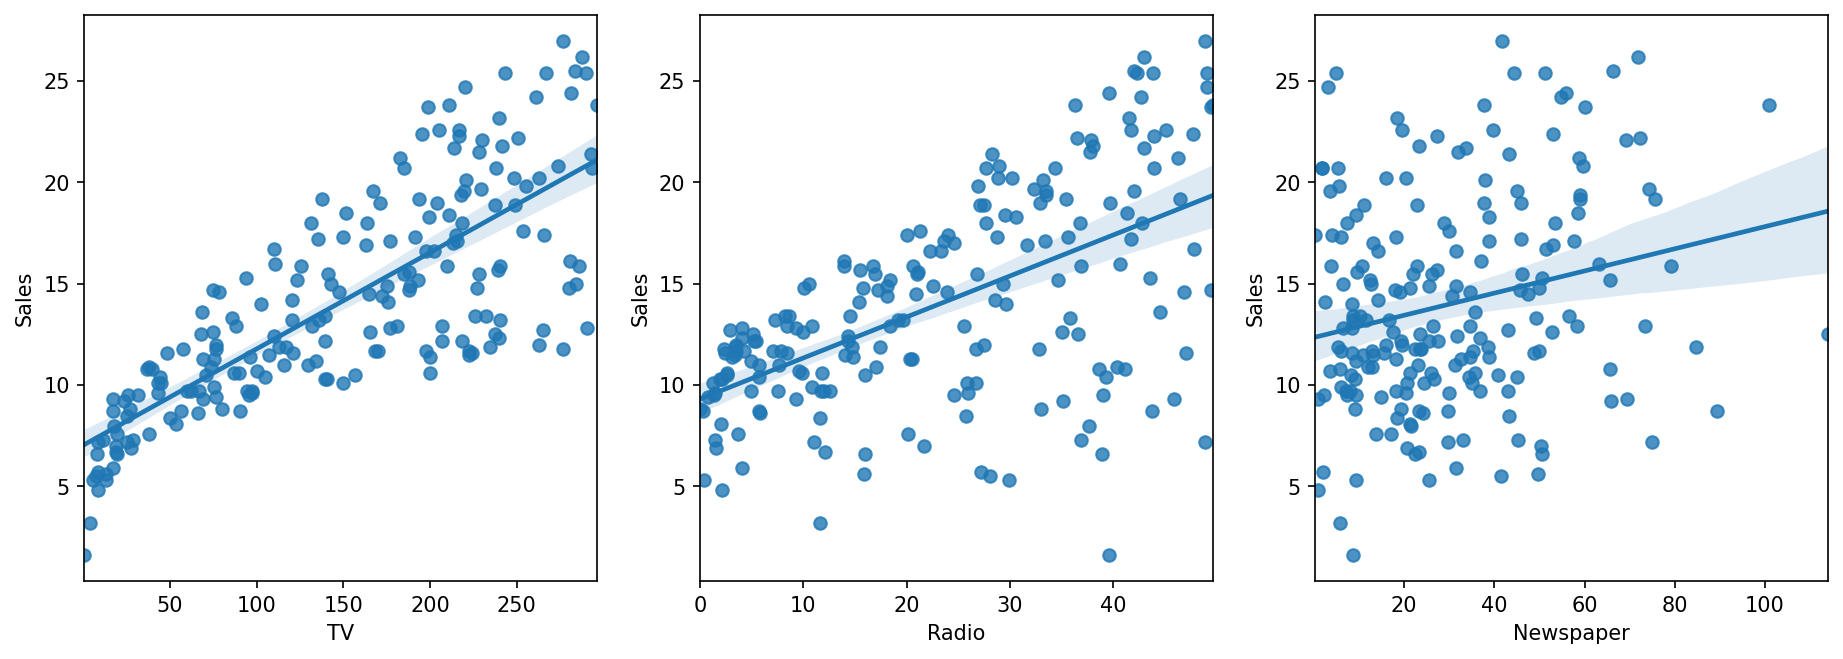

In [5]:

fig=plt.figure(figsize=(15,5),dpi=150)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1,3,3)
sns.regplot(ax=ax1,x='TV', y='Sales',data=df)
sns.regplot(ax=ax2,x='Radio', y='Sales',data=df)
sns.regplot(ax=ax3,x='Newspaper', y='Sales',data=df)
#sns.regplot function: Plot data and a linear regression model fit.
#plt.figure:  Create a new figure, or activate an existing figure.
#.add_subplot:  Add an `~.axes.Axes` to the figure as part of a subplot arrangement.
#sns.regplot ile regresyon plotlarını çizeriz.


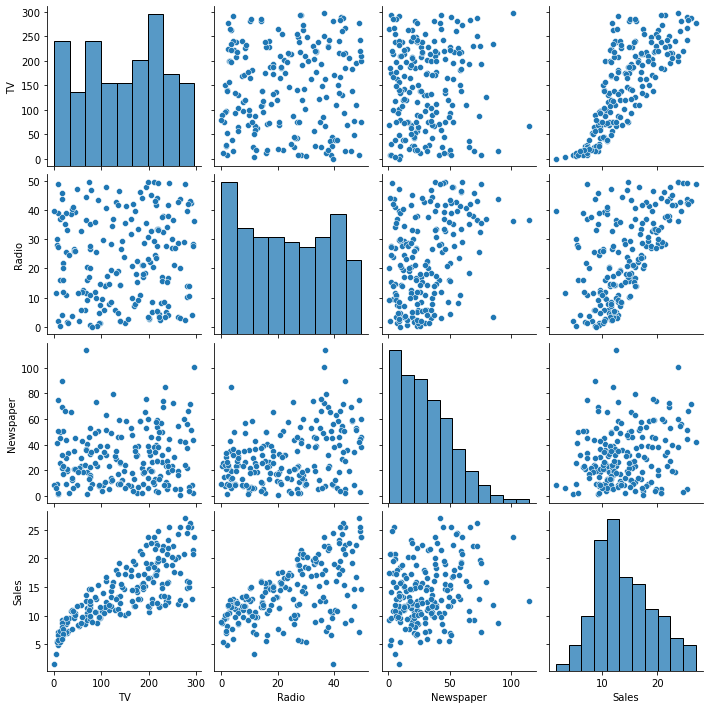

In [6]:
sns.pairplot(df)
#Plot pairwise relationships in a dataset.
#featureların kendi içinde nasıl bir ilişki içinde old gösterir.Yanı birbiriyle independent olmasını isteriz .
#Mesela burada TV ye çok radio ya az para harcandığı zaman satışın ne olacağı ile bir fikrimiz yok.


<AxesSubplot:>

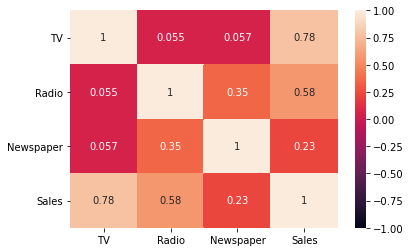

In [7]:
corr=df.corr()
sns.heatmap(df.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)
#.corr() Compute pairwise correlation of columns, excluding NA/null values.
#.heatmap(): Plot rectangular data as a color-encoded matrix.

Korelasyon tablosunda biz ikili koralesyonları düşük olmasını istiyoruz.Daha fazla yorum yapabilmek için mesela radio newspaper arasında 0.35 tüksek değil ama rahatsız ediyor.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
X=df.drop('Sales',axis=1)
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
y=df['Sales']
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [12]:
lm = LinearRegression()
#Öncelikle linear regresyon objesi yaratıyoruz.

In [13]:
lm.fit(X,y)
#daha sonra .fit() ile datayı eğitiyoruz.

LinearRegression()

In [14]:
lm.coef_
#lm.coef_ katsatyıları verir.linear regresyon ile eğittiğimizden 3 feature olan tv radio newspaper katsayıları.

array([ 0.04576465,  0.18853002, -0.00103749])

In [15]:
# print the intercept
print(lm.intercept_)
#Bo aslında y yi kestiği yer

2.9388893694594085


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


coeff_df=pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

In [17]:
lm.predict(X)


array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [18]:
lm.predict(X)
#.predict ile X datalarını al y yi tahmin et
lm.predict(X).shape

(200,)

In [19]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
pd.DataFrame({'Actual':y,'Predicted': lm.predict(X)})

,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


In [21]:
predictions=lm.predict(X) ;predictions

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

<AxesSubplot:xlabel='Sales', ylabel='Count'>

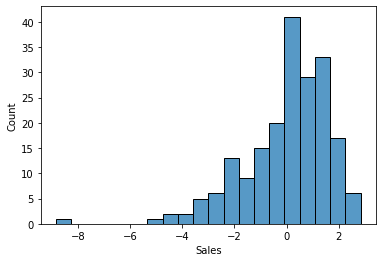

In [22]:
sns.histplot((y-predictions),bins=20)
#sns.histplot:Plot univariate or bivariate histograms to show distributions of datasets.
#bins= histiogramın kaç parçaya bölüneceğini söylüyor.
#gerçek değerler ile tahminler arası farkların histogramını çizdik.

In [23]:
lm.score(X,y)
#R^2 yi veriyor.1 e yakın olması iyi aslında 0 ve 1 arasında olması gerekir.

0.8972106381789522

In [24]:
from sklearn import metrics

In [25]:
metrics.mean_squared_error(y,predictions)
#y ile prediction arasındaki mean_squared_error hesaplanır.

2.784126314510936

# We can use statsmodel library to produce p-values
# ----------------------------------------------------------------------------------------

In [26]:
import statsmodels.api as sm

In [27]:
X2 = sm.add_constant(X)

In [28]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        15:37:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# ----------------------------------------------------------------------------------

In [29]:
# Let's continue with sklearn
predictions = lm.predict(X)
predictions

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [30]:
comp=pd.DataFrame({'Actual':y, 'Predicted':predictions})
comp

,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


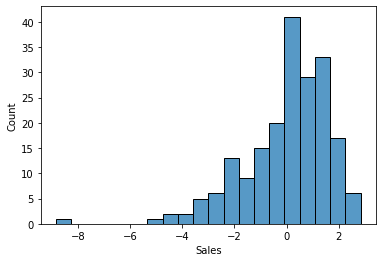

In [31]:
sns.histplot((y-predictions),bins=20);

# Model's $R^2$

In [32]:
lm.score(X,y)

0.8972106381789522

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_squared_error(y,predictions)

2.784126314510936

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


All of these are **loss functions**, because we want to minimize them.

In [35]:
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 1.252011229687068
MSE: 2.784126314510936
RMSE: 1.6685701407225697


# What we have done so far is completely wrong since we did not split the data into training and test set

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17) aynı olur.random_state=17 istediğimi yazarım farklı yazmak farklı sonuç üretir

In [38]:
X_test

,TV,Radio,Newspaper
0,230.1,37.8,69.2
146,240.1,7.3,8.7
158,11.7,36.9,45.2
176,248.4,30.2,20.3
197,177.0,9.3,6.4
82,75.3,20.3,32.5
75,16.9,43.7,89.4
85,193.2,18.4,65.7
80,76.4,26.7,22.3
157,149.8,1.3,24.3


In [39]:
X_train

,TV,Radio,Newspaper
9,199.8,2.6,21.2
19,147.3,23.9,19.1
199,232.1,8.6,8.7
152,197.6,23.3,14.2
3,151.5,41.3,58.5
...,...,...,...
57,136.2,19.2,16.6
150,280.7,13.9,37.0
134,36.9,38.6,65.6
143,104.6,5.7,34.4


In [40]:

y_train

9      10.6
19     14.6
199    13.4
152    16.6
3      18.5
       ... 
57     13.2
150    16.1
134    10.8
143    10.4
111    21.8
Name: Sales, Length: 160, dtype: float64

In [41]:
y_test

0      22.1
146    13.2
158     7.3
176    20.2
197    12.8
82     11.3
75      8.7
85     15.2
80     11.8
157    10.1
71     12.4
95     16.9
138     9.6
109    19.8
147    25.4
192     5.9
126     6.6
16     12.5
87     16.0
103    14.7
177    11.7
127     8.8
11     17.4
113    15.9
94     11.5
140    10.9
170     8.4
13      9.7
69     22.3
105    19.2
81     12.3
130     1.6
160    14.4
54     20.2
37     14.7
132     5.7
64     18.0
151    11.6
51     10.7
153    19.0
Name: Sales, dtype: float64

## Creating and Training the Model

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train,y_train)

LinearRegression()

In [44]:
lm.coef_

array([ 0.04376936,  0.19767522, -0.00187394])

In [45]:
# Model's performance on the test set
lm.score(X_test,y_test)
#performance test setinde değerlendirir.

0.8266375240641092

In [46]:
predictions = lm.predict(X_test)
#kullanılmayan x değerlerini formüle koy tahmin yaptır.

In [47]:
comparison=pd.DataFrame({"Actual":y_test,"prediction":lm.predict(X_test)});comparison.head()

,Actual,prediction
0,22.1,20.500298
146,13.2,15.022271
158,7.3,10.808136
176,20.2,19.890581
197,12.8,12.660084


In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3409774291262115
MSE: 4.535785391880799
RMSE: 2.1297383388296316


In [49]:
print('mean absolute error:', metrics.mean_absolute_error(y_test,predictions))
print('mean squared error:' ,metrics.mean_squared_error(y_test,predictions))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


mean absolute error: 1.3409774291262115
mean squared error: 4.535785391880799
root mean squared error: 2.1297383388296316


# Credit Data Set

In [50]:
df = pd.read_csv('Credit_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [51]:
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [52]:
dummies = pd.get_dummies(df[['Gender', 'Student', 'Married','Ethnicity']])
#.get_dummies fonksiyonu dummy kolonlar üretir.

Dummy kolon üretmemizin amacı fatada feature olanlardaa string versa yes  no female male gibi bunları 1 ve 0 a dönüştürmek için kullanıyoruz.


In [53]:
dummies

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
395,0,1,1,0,0,1,0,0,1
396,0,1,1,0,1,0,1,0,0
397,1,0,1,0,0,1,0,0,1
398,0,1,1,0,0,1,0,0,1


In [54]:
y = df.Balance

In [55]:
# Drop the column with the independent variable (Balance), and columns for which we created dummy variables
X_ = df.drop(['ID','Gender', 'Student', 'Married','Ethnicity','Balance'], axis = 1).astype('float64')


# Define the feature set X.
X = pd.concat([X_, dummies[['Gender_Male', 'Student_Yes', 'Married_Yes','Ethnicity_African American','Ethnicity_Asian']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      400 non-null    float64
 1   Limit                       400 non-null    float64
 2   Rating                      400 non-null    float64
 3   Cards                       400 non-null    float64
 4   Age                         400 non-null    float64
 5   Education                   400 non-null    float64
 6   Gender_Male                 400 non-null    uint8  
 7   Student_Yes                 400 non-null    uint8  
 8   Married_Yes                 400 non-null    uint8  
 9   Ethnicity_African American  400 non-null    uint8  
 10  Ethnicity_Asian             400 non-null    uint8  
dtypes: float64(6), uint8(5)
memory usage: 20.8 KB


In [56]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
0,14.891,3606.0,283.0,2.0,34.0,11.0,1,0,1,0,0
1,106.025,6645.0,483.0,3.0,82.0,15.0,0,1,1,0,1
2,104.593,7075.0,514.0,4.0,71.0,11.0,1,0,0,0,1
3,148.924,9504.0,681.0,3.0,36.0,11.0,0,0,0,0,1
4,55.882,4897.0,357.0,2.0,68.0,16.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100.0,307.0,3.0,32.0,13.0,1,0,1,0,0
396,13.364,3838.0,296.0,5.0,65.0,17.0,1,0,0,1,0
397,57.872,4171.0,321.0,5.0,67.0,12.0,0,0,1,0,0
398,37.728,2525.0,192.0,1.0,44.0,13.0,1,0,1,0,0


In [57]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [59]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income,-7.681878
Limit,0.174630
Rating,1.369386
Cards,15.448404
Age,-0.533691
Education,0.033521
Gender_Male,3.500164
Student_Yes,417.307463
Married_Yes,-13.559262
Ethnicity_African American,-5.253777


In [61]:
# Model's performance on the test set
lm.score(X_test,y_test)

0.953861603704349

In [62]:
X_test

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
332,62.328,5228.0,377.0,3.0,83.0,15.0,1,0,0,0,0
111,28.575,2959.0,231.0,2.0,60.0,11.0,0,0,0,1,0
352,104.483,7140.0,507.0,2.0,41.0,14.0,1,0,1,1,0
205,10.793,3878.0,321.0,8.0,29.0,13.0,1,0,0,0,0
56,57.100,4742.0,372.0,7.0,79.0,18.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
304,82.706,7506.0,536.0,2.0,64.0,13.0,0,0,1,0,1
187,23.365,2179.0,167.0,2.0,75.0,15.0,1,0,0,0,1
166,35.691,2880.0,214.0,2.0,35.0,15.0,1,0,0,1,0
64,32.164,2937.0,223.0,2.0,79.0,15.0,0,0,1,1,0


In [63]:
predictions = lm.predict(X_test)
predictions

array([ 458.97071185,  110.02902174,  635.17455723,  648.41400763,
        467.30323546, -153.63064949,  245.36173526,  704.17551012,
        769.75177824,  166.59718732, -233.29889874,  254.09560396,
        951.70123392,  922.93452406,  -43.15231473,  288.65388951,
        463.44491876,  608.73250865,  923.31297439, 1090.00405984,
        784.01157664,  307.3999271 ,  406.68094507,  560.20083416,
       1187.08219541,  780.33486158, -321.36196728,  347.45053893,
       1337.67926209, -101.12645961,  929.60292755,  293.81759478,
         85.03823317,  691.93726489,  494.42174418,  681.45221871,
        303.40542441,  322.43662413,  -48.10416623,  -81.83901318,
        552.01669369,    9.24942487, 1314.34445241, 1017.22900331,
       -232.15037484,  -28.05641414, 1307.32506617,  697.81165123,
        618.61552034,  334.30548333,  262.20709854, 1021.73473367,
        724.05003255,  478.25581259, -236.20807909, 1565.0898437 ,
        675.97944609,  633.44427665,  423.59072477,  643.51046

In [64]:
y_test

332    380
111      0
352    583
205    638
56     379
      ... 
304    905
187      0
166      0
64       0
27     467
Name: Balance, Length: 80, dtype: int64

In [65]:
predictions

array([ 458.97071185,  110.02902174,  635.17455723,  648.41400763,
        467.30323546, -153.63064949,  245.36173526,  704.17551012,
        769.75177824,  166.59718732, -233.29889874,  254.09560396,
        951.70123392,  922.93452406,  -43.15231473,  288.65388951,
        463.44491876,  608.73250865,  923.31297439, 1090.00405984,
        784.01157664,  307.3999271 ,  406.68094507,  560.20083416,
       1187.08219541,  780.33486158, -321.36196728,  347.45053893,
       1337.67926209, -101.12645961,  929.60292755,  293.81759478,
         85.03823317,  691.93726489,  494.42174418,  681.45221871,
        303.40542441,  322.43662413,  -48.10416623,  -81.83901318,
        552.01669369,    9.24942487, 1314.34445241, 1017.22900331,
       -232.15037484,  -28.05641414, 1307.32506617,  697.81165123,
        618.61552034,  334.30548333,  262.20709854, 1021.73473367,
        724.05003255,  478.25581259, -236.20807909, 1565.0898437 ,
        675.97944609,  633.44427665,  423.59072477,  643.51046

In [66]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
comp

,Actual,Predicted
332,380,458.970712
111,0,110.029022
352,583,635.174557
205,638,648.414008
56,379,467.303235
...,...,...
304,905,908.454323
187,0,-59.998682
166,0,35.265929
64,0,44.096507


In [67]:
comp['residuals'] = comp['Actual']-comp['Predicted']
comp

,Actual,Predicted,residuals
332,380,458.970712,-78.970712
111,0,110.029022,-110.029022
352,583,635.174557,-52.174557
205,638,648.414008,-10.414008
56,379,467.303235,-88.303235
...,...,...,...
304,905,908.454323,-3.454323
187,0,-59.998682,59.998682
166,0,35.265929,-35.265929
64,0,44.096507,-44.096507


<AxesSubplot:xlabel='residuals', ylabel='Count'>

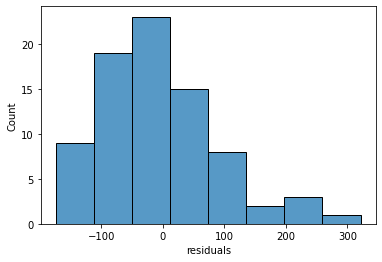

In [68]:
sns.histplot(comp['residuals'])
#grafikten anladığım residual pozitif olanlar tahminlerimizin biraz düşük kaldığını gösteriyor.

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 75.79118959094788
MSE: 9260.299220657218
RMSE: 96.23044851115066


In [70]:
np.sum((y_test-np.mean(y_test))**2)/len(y_test)
#variance hesaplanır.

200707.0025

In [71]:
1-9260/200707.0025

0.9538630945375212

In [72]:
metrics.r2_score(y_test,predictions)

0.953861603704349

In [73]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [74]:
y=np.array(auto['mpg'])
x=np.array(auto['horsepower'])

In [75]:
y=np.array(auto['mpg'])
x=np.array(auto['horsepower']).reshape(-1,1)

In [76]:
model = LinearRegression()
model.fit(x, y)
model.score(x,y)

0.6059482578894348

In [77]:
x

array([[ 46],
       [ 46],
       [ 48],
       [ 48],
       [ 48],
       [ 49],
       [ 52],
       [ 52],
       [ 52],
       [ 52],
       [ 53],
       [ 53],
       [ 54],
       [ 58],
       [ 58],
       [ 60],
       [ 60],
       [ 60],
       [ 60],
       [ 60],
       [ 61],
       [ 62],
       [ 62],
       [ 63],
       [ 63],
       [ 63],
       [ 64],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 66],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 69],
       [ 69],
       [ 69],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
      

In [78]:
y

array([26. , 26. , 43.4, 44.3, 43.1, 29. , 29. , 32.8, 44. , 31. , 33. ,
       33. , 23. , 36. , 39.1, 35.1, 27. , 36.1, 38.1, 24.5, 32. , 29.8,
       37.7, 38. , 34.7, 30.5, 39. , 37.2, 34.1, 37. , 34.4, 40.8, 29.9,
       31. , 32. , 31.8, 46.6, 36.1, 30. , 31. , 31. , 38. , 32. , 38. ,
       26. , 36.4, 32.3, 33.8, 44.6, 30. , 34.1, 37. , 31. , 29.5, 31.5,
       30. , 26. , 35. , 37.3, 29. , 33.5, 39.4, 32. , 29. , 32.1, 34. ,
       36. , 34.5, 30. , 34.2, 26. , 25. , 29.5, 31.9, 31.5, 27.2, 15. ,
       15. , 22. , 26.5, 32.4, 21. , 36. , 31.6, 33. , 25. , 32.4, 33.7,
       26. , 32.2, 31.3, 30.9, 28. , 28. , 24. , 26. , 36. , 24. , 29. ,
       30. , 30.7, 41.5, 22. , 25.4, 18. , 34.3, 30.5, 23. , 26. , 29. ,
       28. , 26. , 27.4, 26. , 25. , 28. , 35.7, 28.1, 30. , 24. , 25. ,
       31. , 33.5, 29. , 27. , 23. , 29. , 36. , 26.6, 30. , 32. , 27.2,
       17.6, 20.2, 21. , 23.8, 19.8, 31. , 38. , 20.8, 19. , 22. , 28. ,
       21. , 27. , 23. , 25. , 21. , 26.4, 18. , 19

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)



In [80]:
x_train

array([[ 88],
       [190],
       [ 70],
       [ 82],
       [ 95],
       [ 53],
       [ 72],
       [105],
       [ 65],
       [115],
       [ 72],
       [ 69],
       [ 75],
       [ 90],
       [152],
       [120],
       [ 79],
       [150],
       [ 75],
       [110],
       [ 65],
       [ 95],
       [ 87],
       [ 70],
       [ 92],
       [ 60],
       [155],
       [ 97],
       [ 97],
       [150],
       [ 63],
       [ 88],
       [ 88],
       [165],
       [193],
       [ 61],
       [ 90],
       [ 70],
       [100],
       [ 66],
       [ 90],
       [110],
       [ 92],
       [158],
       [150],
       [110],
       [112],
       [ 83],
       [ 72],
       [105],
       [100],
       [113],
       [148],
       [110],
       [ 65],
       [180],
       [ 87],
       [170],
       [165],
       [145],
       [110],
       [ 86],
       [ 95],
       [ 65],
       [145],
       [ 60],
       [ 90],
       [ 88],
       [ 78],
       [ 49],
       [125],
      

In [81]:
y_train

array([18. , 15. , 34.2, 31. , 22. , 33. , 15. , 16. , 32. , 25. , 32.4,
       35. , 33.7, 28. , 14.5, 24.2, 26. , 16. , 28. , 23.5, 37. , 24. ,
       21. , 26. , 25. , 36.1, 16.9, 23.9, 19. , 13. , 30.5, 27. , 35. ,
       14. ,  9. , 32. , 28. , 29. , 19. , 36.1, 22.5, 17.5, 26. , 13. ,
       15. , 18.6, 18. , 27. , 21. , 18. , 32.9, 26. , 14. , 18. , 46.6,
       12. , 25. , 15.5, 15. , 15. , 19.9, 28. , 25. , 31.8, 19.2, 24.5,
       19.1, 22.3, 26. , 29. , 17. , 17.6, 11. , 20. , 18. , 23.7, 18. ,
       33.5, 29.8, 13. , 30.5, 20.8, 36. , 30. , 20. , 37.3, 27.2, 26.8,
       12. , 27.2, 26.4, 30. , 13. , 14. , 23. , 18. , 17.6, 28.1, 18. ,
       30. , 26. , 26. , 34.1, 17. , 26. , 12. , 30. , 15.5, 16. , 18.2,
       31.6, 28. , 13. , 23. , 29. , 30. , 13. , 19.2, 13. , 16.5, 22. ,
       25. , 28. , 32.4, 13. , 34. , 32.3, 25. , 27. , 14. , 18. , 24. ,
       33. , 15. , 19. , 17. , 16. , 17. , 37. , 43.4, 31. , 16. , 13. ,
       35.7, 25. , 24. , 13. , 22. , 20.5, 28.4, 14

In [82]:
x_test

array([[100],
       [175],
       [130],
       [150],
       [110],
       [110],
       [ 96],
       [ 67],
       [149],
       [ 69],
       [ 84],
       [ 88],
       [230],
       [208],
       [ 70],
       [ 70],
       [ 76],
       [ 90],
       [ 64],
       [ 52],
       [100],
       [112],
       [ 67],
       [ 96],
       [ 46],
       [ 70],
       [ 84],
       [112],
       [115],
       [ 63],
       [ 92],
       [105],
       [225],
       [ 92],
       [108],
       [100],
       [102],
       [ 88],
       [ 75],
       [140],
       [ 90],
       [ 90],
       [140],
       [160],
       [ 95],
       [ 88],
       [ 80],
       [150],
       [105],
       [100],
       [ 80],
       [ 78],
       [ 76],
       [ 85],
       [ 54],
       [210],
       [ 89],
       [ 72],
       [ 79],
       [105],
       [132],
       [ 84],
       [100],
       [ 75],
       [215],
       [ 68],
       [ 76],
       [150],
       [ 95],
       [ 70],
       [ 65],
      

In [83]:
y_test

array([17. , 14. , 15. , 14. , 15. , 20.6, 24. , 38. , 16. , 26. , 29. ,
       27. , 16. , 11. , 39.4, 34. , 30.7, 33.5, 39. , 29. , 16. , 19. ,
       33.8, 25.5, 26. , 36. , 27.2, 22. , 28.8, 34.7, 25.8, 20.5, 14. ,
       28. , 19. , 18. , 20. , 19. , 26. , 13. , 20. , 21. , 16. , 14. ,
       27.5, 24.5, 25. , 16. , 20.6, 15. , 26. , 34.3, 30. , 38. , 23. ,
       11. , 25.5, 22. , 28. , 27.9, 32.7, 32. , 18. , 29. , 14. , 31. ,
       22. , 18.5, 20. , 32.1, 37.2, 13. , 21.5, 23. , 13. , 24. , 24. ,
       20. , 41.5])

In [84]:
#Fit a linear regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [85]:
y_pred = model.predict(x_test)

In [86]:
model.score(x_test,y_test)

0.46003770924907117

In [87]:
compa=pd.DataFrame({'Actual':y_test,'Prediction':y_pred});compa
compa['Fark']=y_test-y_pred
compa

,Actual,Prediction,Fark
0,17.0,24.108494,-7.108494
1,14.0,11.784860,2.215140
2,15.0,19.179040,-4.179040
3,14.0,15.892738,-1.892738
4,15.0,22.465343,-7.465343
...,...,...,...
74,13.0,19.179040,-6.179040
75,24.0,27.230481,-3.230481
76,24.0,28.216372,-4.216372
77,20.0,25.587330,-5.587330


In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.538779442517319
MSE: 31.72201024056559
RMSE: 5.632229597642979


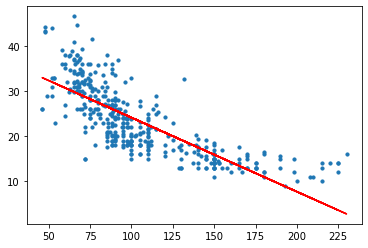

In [89]:
plt.scatter(x, y, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()
# x ve y değerlerini scatter çizdirdik.
# x_test ve prediction değerlerini linear çizdirdik.

In [90]:
from sklearn.preprocessing import PolynomialFeatures
#multi variable da ploynomial lin reg yapmak için import ediyoruz.

In [91]:
polynomial_features=PolynomialFeatures(degree=2,include_bias=False)

In [113]:
polynomial_features.fit_transform(x)
#polynomial features da (x) i verdiğimizde 2 dereceden değişken üretiyor.

array([[4.60000000e+01, 2.11600000e+03, 9.73360000e+04, 4.47745600e+06],
       [4.60000000e+01, 2.11600000e+03, 9.73360000e+04, 4.47745600e+06],
       [4.80000000e+01, 2.30400000e+03, 1.10592000e+05, 5.30841600e+06],
       ...,
       [2.25000000e+02, 5.06250000e+04, 1.13906250e+07, 2.56289062e+09],
       [2.25000000e+02, 5.06250000e+04, 1.13906250e+07, 2.56289062e+09],
       [2.30000000e+02, 5.29000000e+04, 1.21670000e+07, 2.79841000e+09]])

In [93]:
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[4.6000e+01, 2.1160e+03],
       [4.6000e+01, 2.1160e+03],
       [4.8000e+01, 2.3040e+03],
       [4.8000e+01, 2.3040e+03],
       [4.8000e+01, 2.3040e+03],
       [4.9000e+01, 2.4010e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.3000e+01, 2.8090e+03],
       [5.3000e+01, 2.8090e+03],
       [5.4000e+01, 2.9160e+03],
       [5.8000e+01, 3.3640e+03],
       [5.8000e+01, 3.3640e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.1000e+01, 3.7210e+03],
       [6.2000e+01, 3.8440e+03],
       [6.2000e+01, 3.8440e+03],
       [6.3000e+01, 3.9690e+03],
       [6.3000e+01, 3.9690e+03],
       [6.3000e+01, 3.9690e+03],
       [6.4000e+01, 4.0960e+03],
       [6.5000e+01, 4.2250e+03],
       [6.5000e+01, 4.2250e+03],
       [6.5000e+01, 4.2250e+03],
       [6.

In [114]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
#artık fit ettirmek için x_poly 2. dereceden polinom ile y yi alıyoruz.

LinearRegression()

In [95]:
polymodel.intercept_

56.90009970211295

In [96]:
polymodel.coef_

array([-0.46618963,  0.00123054])

In [97]:
y_poly_pred = polymodel.predict(x_poly)

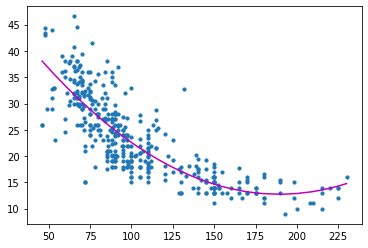

In [98]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [99]:
polynomial_features= PolynomialFeatures(degree=3,include_bias=False)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[4.6000000e+01, 2.1160000e+03, 9.7336000e+04],
       [4.6000000e+01, 2.1160000e+03, 9.7336000e+04],
       [4.8000000e+01, 2.3040000e+03, 1.1059200e+05],
       ...,
       [2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [2.3000000e+02, 5.2900000e+04, 1.2167000e+07]])

In [100]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)

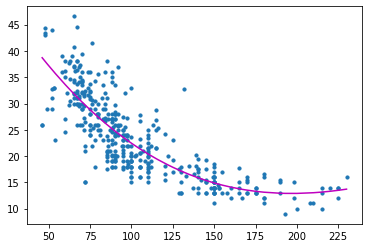

In [101]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [102]:
polynomial_features= PolynomialFeatures(degree=10,include_bias=False)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[4.60000000e+01, 2.11600000e+03, 9.73360000e+04, ...,
        2.00476122e+13, 9.22190163e+14, 4.24207475e+16],
       [4.60000000e+01, 2.11600000e+03, 9.73360000e+04, ...,
        2.00476122e+13, 9.22190163e+14, 4.24207475e+16],
       [4.80000000e+01, 2.30400000e+03, 1.10592000e+05, ...,
        2.81792804e+13, 1.35260546e+15, 6.49250621e+16],
       ...,
       [2.25000000e+02, 5.06250000e+04, 1.13906250e+07, ...,
        6.56840836e+18, 1.47789188e+21, 3.32525673e+23],
       [2.25000000e+02, 5.06250000e+04, 1.13906250e+07, ...,
        6.56840836e+18, 1.47789188e+21, 3.32525673e+23],
       [2.30000000e+02, 5.29000000e+04, 1.21670000e+07, ...,
        7.83109853e+18, 1.80115266e+21, 4.14265112e+23]])

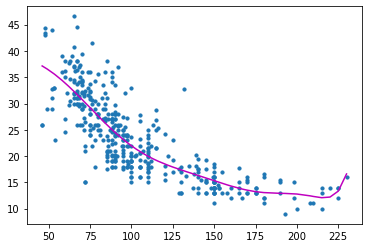

In [103]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [105]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)

31.72201024056559
0.46003770924907117


In [115]:
polynomial_features= PolynomialFeatures(degree=4,include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)
#hem train seti hem test seti fit transform yapıyoruz.

In [109]:
X_poly_test.reshape(1,-1)

array([[1.00000000e+02, 1.00000000e+04, 1.00000000e+06, 1.00000000e+08,
        1.75000000e+02, 3.06250000e+04, 5.35937500e+06, 9.37890625e+08,
        1.30000000e+02, 1.69000000e+04, 2.19700000e+06, 2.85610000e+08,
        1.50000000e+02, 2.25000000e+04, 3.37500000e+06, 5.06250000e+08,
        1.10000000e+02, 1.21000000e+04, 1.33100000e+06, 1.46410000e+08,
        1.10000000e+02, 1.21000000e+04, 1.33100000e+06, 1.46410000e+08,
        9.60000000e+01, 9.21600000e+03, 8.84736000e+05, 8.49346560e+07,
        6.70000000e+01, 4.48900000e+03, 3.00763000e+05, 2.01511210e+07,
        1.49000000e+02, 2.22010000e+04, 3.30794900e+06, 4.92884401e+08,
        6.90000000e+01, 4.76100000e+03, 3.28509000e+05, 2.26671210e+07,
        8.40000000e+01, 7.05600000e+03, 5.92704000e+05, 4.97871360e+07,
        8.80000000e+01, 7.74400000e+03, 6.81472000e+05, 5.99695360e+07,
        2.30000000e+02, 5.29000000e+04, 1.21670000e+07, 2.79841000e+09,
        2.08000000e+02, 4.32640000e+04, 8.99891200e+06, 1.871773

In [110]:
polymodel = LinearRegression()
polymodel.fit(X_poly_train, y_train)
y_poly_pred = polymodel.predict(X_poly_test)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)
print(mse)
print(r2)

26.932769727490193
0.5415586866015846


In [112]:
polymodel.score(X_poly_test,y_test)

0.5415586866015846